In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

from music_analysis import REPO_ROOT

# 日本語フォントの設定
mpl.rcParams["font.family"] = "Hiragino Sans"

load_dotenv(REPO_ROOT / ".env")

True

In [3]:
from music_analysis.preprocess.retrieve import TrackRetriever
from music_analysis.preprocess.tables import TrackInfoTable

In [4]:
client_credentials_manager = SpotifyClientCredentials(
    os.environ["SPOTIPY_CLIENT_ID"], os.environ["SPOTIPY_CLIENT_SECRET"]
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
track_retriever = TrackRetriever(sp)
# artist_meta = track_retriever.get_artist_with_name("Gen hoshino")
artist_meta = track_retriever.get_artist_with_id("6cMnpAZ9QN0wn4dVd0Tinb")
albums = track_retriever.glob_artist_albums(artist_meta)

2024-03-15 13:22:25 - music_analysis.preprocess.retrieve - INFO - retrieve:39 - Total albums: 4


In [6]:
tracks = []
for album in albums:
    tracks.extend(track_retriever.glob_album_tracks(album))

2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:51 - PRISMATICS inclues 10 tracks
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 1. LIGHT HOUSE
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 2. FANTASY
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 3. MISTY
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 4. CLOUD
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 5. OXY
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 6. HAVE A NICE DAY
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 7. SUNNY
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 8. SWITCH - TV edition
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 9. MOON
2024-03-15 13:22:30 - music_analysis.preprocess.retrieve - IN

In [7]:
track_info_table = TrackInfoTable(sp, tracks)

In [8]:
track_info_df = track_info_table.get_track_info_df()
track_info_df

,トラックID,アーティストID,トラック名,アーティスト名,曲長[ms],平均ラウドネス[dB],テンポ(BPM),拍子,キー,長短長,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,4wsuapv1hp5YxJJsMIP3wD,6cMnpAZ9QN0wn4dVd0Tinb,LIGHT HOUSE,TENDRE,223440,-8.756,114.950,4,C♯/D♭,Major,0.732,0.7530,0.0505,0.16600,0.141000,0.1190,0.441
1,2qfEkXsVx69flzqbZHRvao,6cMnpAZ9QN0wn4dVd0Tinb,FANTASY,TENDRE,210120,-9.398,107.992,4,G♯/A♭,Major,0.738,0.6610,0.0323,0.01380,0.582000,0.0797,0.593
2,07VPVDIqc2U4jEFXUvH39w,6cMnpAZ9QN0wn4dVd0Tinb,MISTY,TENDRE,210960,-9.334,98.051,4,B,Major,0.689,0.6240,0.0265,0.00969,0.461000,0.0790,0.638
3,3nUL2xRXHE2WPPZ0n5Pqmi,6cMnpAZ9QN0wn4dVd0Tinb,CLOUD,TENDRE,223467,-11.146,139.975,4,D,Major,0.785,0.3950,0.0483,0.72500,0.193000,0.0809,0.339
4,04Gya07CIoWA7SBgd8r9vD,6cMnpAZ9QN0wn4dVd0Tinb,OXY,TENDRE,239680,-8.531,163.964,4,C♯/D♭,Minor,0.588,0.6250,0.0410,0.59400,0.221000,0.1090,0.298
5,4dKezswt0ZVqyrAVQVIPqt,6cMnpAZ9QN0wn4dVd0Tinb,HAVE A NICE DAY,TENDRE,218347,-8.078,154.955,4,F♯/G♭,Major,0.670,0.7060,0.0521,0.02120,0.102000,0.0601,0.728
6,6ESQiYjLTpepFguTJN2by9,6cMnpAZ9QN0wn4dVd0Tinb,SUNNY,TENDRE,217000,-7.698,95.954,4,C♯/D♭,Major,0.690,0.5430,0.0466,0.27500,0.200000,0.3520,0.601
7,5ppob9Y857ZopVV9LmsAG5,6cMnpAZ9QN0wn4dVd0Tinb,SWITCH - TV edition,TENDRE,124333,-7.952,115.044,4,A♯/B♭,Major,0.723,0.7210,0.0423,0.22800,0.000757,0.8730,0.769
8,3OzK36ab8gCMqsEiNwdQdI,6cMnpAZ9QN0wn4dVd0Tinb,MOON,TENDRE,271880,-15.796,101.803,3,C,Major,0.508,0.1550,0.0418,0.93500,0.176000,0.1000,0.145
9,67Gwp1ZINw6V8VAaafSF7P,6cMnpAZ9QN0wn4dVd0Tinb,PRISM,TENDRE,272853,-10.371,114.907,4,B,Major,0.526,0.3070,0.0473,0.74200,0.244000,0.2080,0.267


<Axes: ylabel='Frequency'>

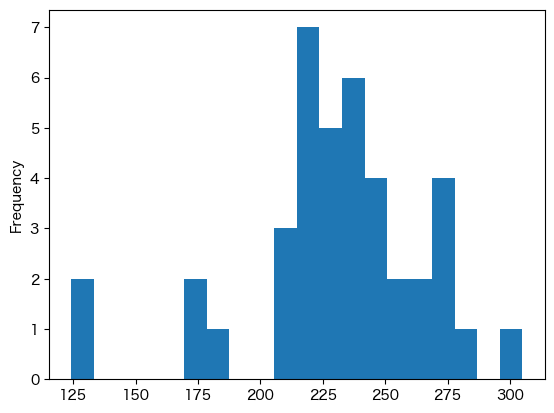

In [9]:
(track_info_df["曲長[ms]"] / 1000).plot.hist(bins=20)

In [10]:
import seaborn as sns

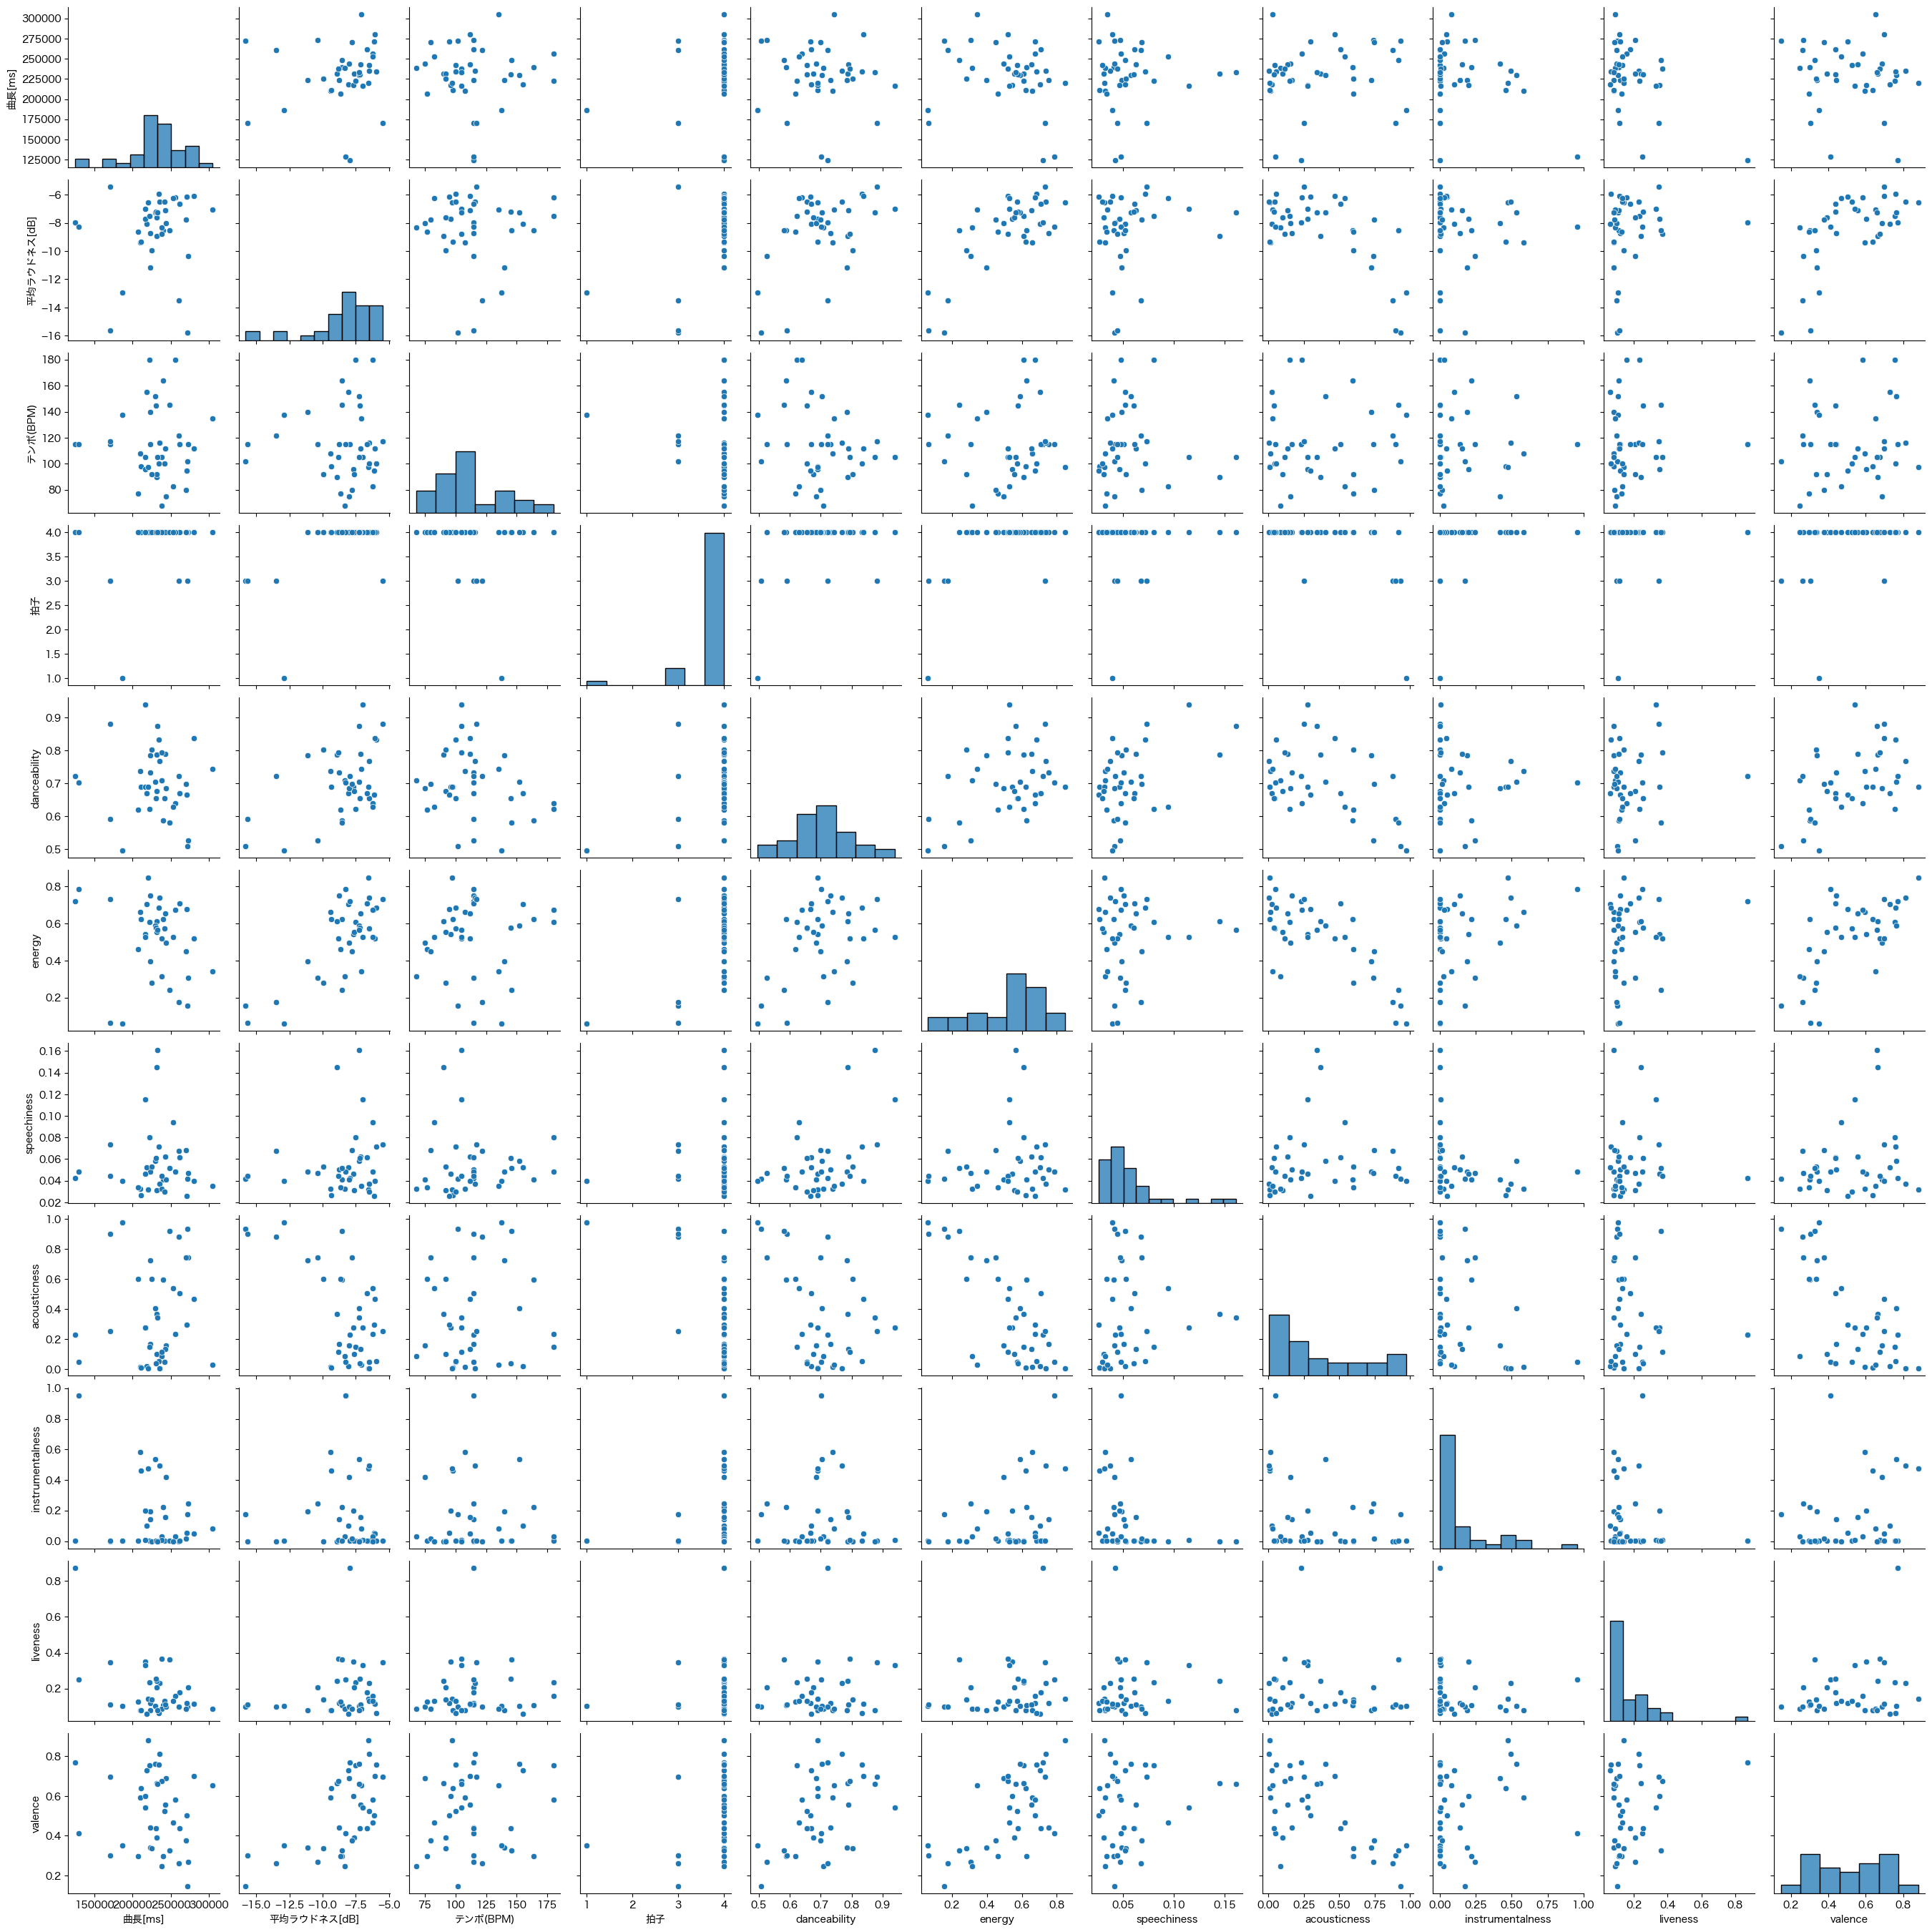

In [11]:
pg = sns.pairplot(track_info_df)